In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_regression

In [3]:
x, y = make_regression(n_samples=100, n_features=3)

In [4]:
x.shape

(100, 3)

In [5]:
y.shape

(100,)

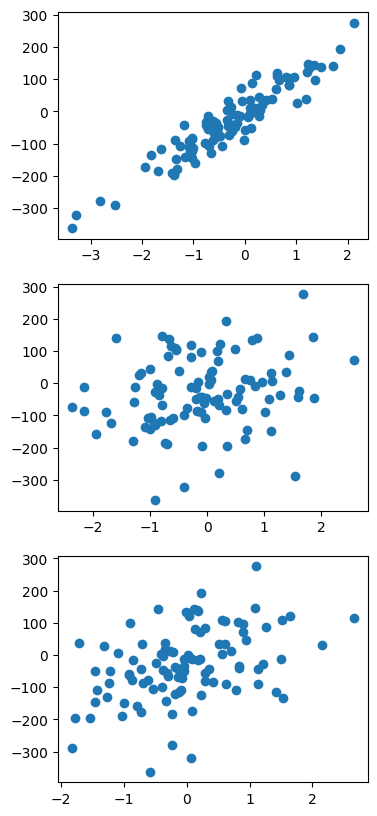

In [6]:
plt.figure(figsize=(4, 10))
plt.subplot(3, 1, 1)
plt.scatter(x[:, 0], y)

plt.subplot(3, 1, 2)
plt.scatter(x[:, 1], y)

plt.subplot(3, 1, 3)
plt.scatter(x[:, 2], y)

plt.show()

In [7]:
x_train = x[:90, :]
x_test = x[90:, :]
y_train = y[:90]
y_test = y[90:]

In [8]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(90, 3) (10, 3) (90,) (10,)


In [9]:
x_train = np.insert(x_train, 0, 1, axis = 1)

In [10]:
x_train.shape

(90, 4)

In [11]:
x_train[0]

array([ 1.        ,  0.07431797, -1.26409331,  0.08985031])

In [21]:
def personal_MLR(x_train, y_train):
    beta = np.linalg.inv(np.dot(x_train.T, x_train)).dot(x_train.T).dot(y_train)

    bias = beta[0]
    coefficients = beta[1 : ]

    return bias, coefficients 

In [13]:
bias, coef = personal_MLR(x_train, y_train)

In [14]:
bias

3.3306690738754696e-16

In [15]:
coef

array([96.41796056, 17.10537451, 39.10074722])

In [16]:
# x_test = np.insert(x_test, 0, 1, axis = 1)

In [17]:
x_test.shape

(10, 3)

In [25]:
def predict(x_test):
    y_pred = np.dot(x_test, coef) + bias
    print(y_pred.shape)
    return y_pred

In [19]:
y_pred  = predict(x_test)

(10,)


In [20]:
y_pred

array([ 114.05036111,  -34.03606031,   19.98639369,  141.73735515,
         35.39380995, -289.44851499,   12.88582843,  147.12150465,
       -184.08520615,  -56.61239359])

In [21]:
y_test.shape

(10,)

In [22]:
for i in range(y_pred.shape[0]):
    print(y_pred[i], y_test[i])

114.05036110913609 114.0503611091361
-34.03606030511265 -34.03606030511264
19.986393692949147 19.98639369294914
141.73735515244934 141.7373551524493
35.39380995193032 35.393809951930315
-289.44851498617396 -289.44851498617396
12.885828430548731 12.885828430548743
147.12150464776965 147.12150464776965
-184.08520614581548 -184.08520614581545
-56.61239358692642 -56.61239358692642


In [23]:
def total_error(y_pred, y_test):
    error = 0
    for i in range(y_pred.shape[0]):
        error += (y_test[i] - y_pred[i])**2
    return error

In [24]:
loss = total_error(y_pred, y_test)

In [25]:
loss

2.1236135568549638e-27

In [26]:
bias

3.3306690738754696e-16

In [27]:
coef

array([96.41796056, 17.10537451, 39.10074722])

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=2)

In [30]:
model.fit(x_train, y_train)

LinearRegression()

In [31]:
model.coef_

array([96.41796056, 17.10537451, 39.10074722])

In [32]:
model.intercept_

7.105427357601002e-15

In [33]:
predictions = model.predict(x_test)

In [34]:
score = 0
for i in range(y_pred.shape[0]):    
    if predictions[i] == y_test[i]:
        score += 1
print(score)

2


In [35]:
for i in range(y_pred.shape[0]):
    print(predictions[i], y_test[i])

-320.6683133924383 -320.6683133924382
-45.92153699330432 -45.92153699330432
4.514981086054931 4.5149810860549415
-12.636120397227277 -12.63612039722729
-113.414578334286 -113.41457833428599
10.463057713624003 10.463057713623988
-54.92352811184594 -54.923528111845926
144.06846661724165 144.06846661724163
-43.357974841494595 -43.357974841494595
-43.04236257951855 -43.04236257951854


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [97]:
df = pd.read_csv('placement.csv')

In [98]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


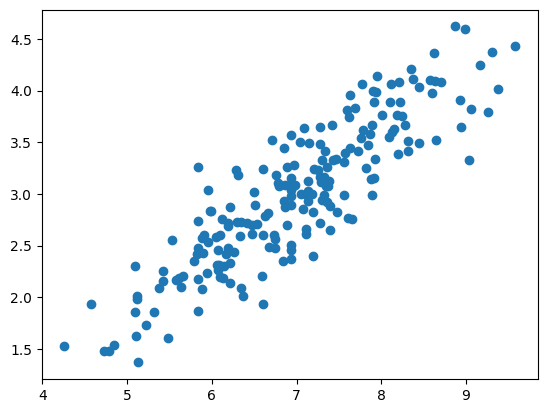

In [99]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])

In [100]:
x = df.iloc[:, 0]
y = df.iloc[:, 1]

In [101]:
x.shape

(200,)

In [102]:
x_train = x[:180]
x_test = x[180:]
y_train = y[:180]
y_test = y[180:]

In [103]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(180,) (20,) (180,) (20,)


In [104]:
x_train = np.array(x_train).reshape(-1, 1)

In [105]:
x_train.shape

(180, 1)

In [106]:
x_train = np.insert(x_train, 0, 1, axis = 1)

In [107]:
x_train.shape

(180, 2)

In [108]:
x_train[0]

array([1.  , 6.89])

In [109]:
bias, coef = personal_MLR(x_train, y_train)

In [110]:
bias

-0.9966180140110079

In [111]:
coef

array([0.57020723])

In [112]:
y_pred = predict(x_test)

ValueError: shapes (20,) and (1,) not aligned: 20 (dim 0) != 1 (dim 0)

In [113]:
x_test = np.array(x_test).reshape(-1, 1)

In [114]:
y_pred = predict(x_test)

(20,)


In [115]:
def total_error(y_pred, y_test):
    error = 0
    for i in range(y_pred.shape[0]):
        error += (y_test[i] - y_pred[i])**2
    return error

In [116]:
y_pred.shape

(20,)

In [117]:
y_test.shape

(20,)

In [118]:
y_pred[1]

3.6904854033738737

In [119]:
y_test = np.array(y_test)

In [120]:
y_test[0]

2.72

In [121]:
loss = total_error(y_pred, y_test)

In [122]:
loss

2.008922597196615

In [123]:
y_pred[0]

2.5329647297374613

In [124]:
y_test[0]

2.72

In [125]:
for i in range(y_pred.shape[0]):
    print(y_pred[i], y_test[i])
    if i == 10:
        break

2.5329647297374613 2.72
3.6904854033738737 3.89
2.3562004889358414 2.08
3.154490608685091 2.72
3.4966149457204834 3.14
2.6013895971445393 3.18
3.4738066565847907 3.47
2.5728792357249235 2.44
3.194405114672553 3.08
3.627762608250717 4.06
2.5329647297374613 2.69
